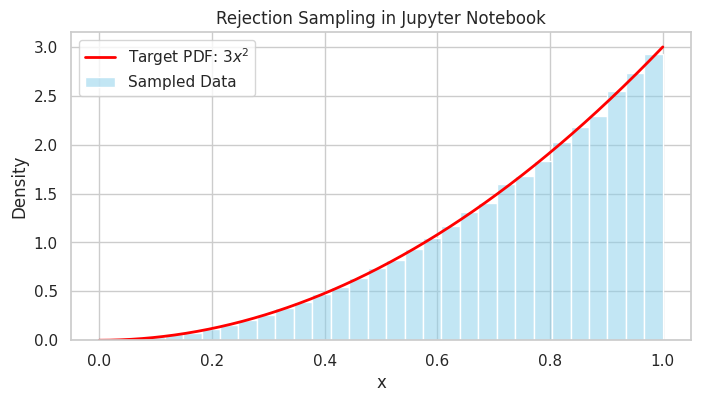

In [1]:
# %% Jupyter Notebook Cell (直接运行此单元)

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 拒绝采样函数
def rejection_sampling(p, M, q_sample, n_samples):
    samples = []
    while len(samples) < n_samples:
        x = q_sample()
        u = np.random.uniform()
        if u <= p(x) / (M * 1):
            samples.append(x)
    return samples

# 定义目标分布和参数
p = lambda x: 3 * x**2
M = 3
q_sample = lambda: np.random.uniform(0, 1)

# 生成样本
samples = rejection_sampling(p, M, q_sample, n_samples=100000)

# --------------------------
# Seaborn绘图
# --------------------------
sns.set_theme(style="whitegrid")  # 设置主题
plt.figure(figsize=(8, 4))

# 绘制直方图
ax = sns.histplot(
    samples,
    bins=30,
    stat="density",
    alpha=0.5,
    color="skyblue",
    label="Sampled Data"
)

# 叠加理论曲线
x = np.linspace(0, 1, 1000)
ax.plot(x, 3*x**2, color="red", linewidth=2, label="Target PDF: $3x^2$")

# 美化图表
ax.legend()
ax.set_xlabel("x")
ax.set_title("Rejection Sampling in Jupyter Notebook")
plt.show()  # 显示图表